In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.font_manager import rcParams
import ipywidgets
from ipywidgets import interact
from numpy.linalg import norm
%matplotlib inline
from sklearn.cluster import KMeans
data = pd.read_csv("Crop_recommendation.csv")
print("Shape of the Dataset :", data.shape)
data.head()
data.isnull().sum()
data['label'].value_counts()


Shape of the Dataset : (2200, 8)


rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [3]:
print("Average Tempature measures in Celsius : {0:.3f}".format(data['temperature'].mean()))
print("Average Relative measures Humidity in % : {0:.3f}".format(data['humidity'].mean()))
print("Average Rainfall measures in mm : {0:.3f}".format(data['rainfall'].mean()))

Average Tempature measures in Celsius : 25.616
Average Relative measures Humidity in % : 71.482
Average Rainfall measures in mm : 103.464


In [4]:
def features(crop= list(data['label'].value_counts().index)):
    x = data[data['label'] == crop]
    print(" Temperature Statistics")
    print("Minimum Temperature : {0:.3f}".format(x['temperature'].min()))
    print("Average Temperature : {0:.3f}".format(x['temperature'].mean()))
    print("Maximum Temperature : {0:.3f}".format(x['temperature'].max()))
    print("**************")
    print(" Rainfall Statistics")
    print("Minimum Rainfall  : {0:.3f}".format(x['rainfall'].min()))
    print("Average Rainfall : {0:.3f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall : {0:.3f}".format(x['rainfall'].max()))
    print("Humidity Statistics")
    print("Minimum Humidity : {0:.3f}".format(x['humidity'].min()))
    print("Average Humidity : {0:.3f}".format(x['humidity'].min()))
    print("Maximum Humidity : {0:.3f}".format(x['humidity'].min()))

/Users/akshaya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/akshaya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/akshaya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

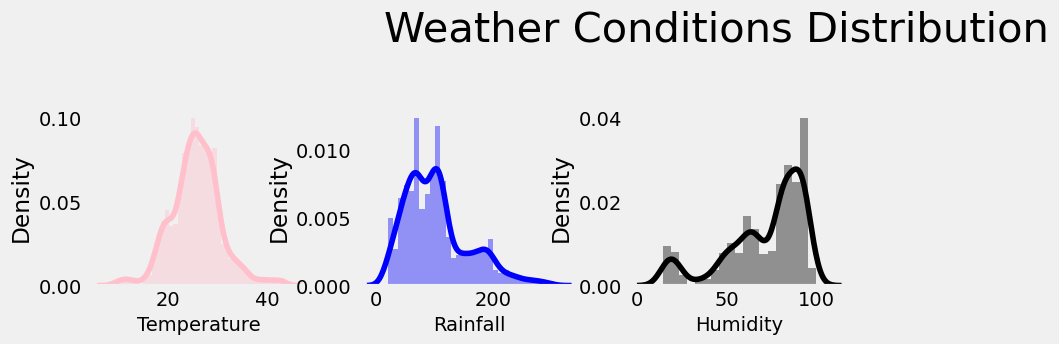

In [5]:
def compare(conditions = ['temperature','rainfall','humidity']):
  print("Average Value for", conditions,"is {0:.3f}".format(data[conditions].mean()))
plt.rcParams['figure.figsize'] = (15,10)
plt.subplot(4, 5, 1)
sns.distplot(data['temperature'], color = 'Pink')
plt.xlabel('Temperature', fontsize = 14)
plt.grid()
plt.subplot(4, 5, 2)
sns.distplot(data['rainfall'], color = 'Blue')
plt.xlabel('Rainfall', fontsize = 14)
plt.grid()
plt.subplot(4, 5, 3)
sns.distplot(data['humidity'], color = 'Black')
plt.xlabel('Humidity', fontsize = 14)
plt.grid()
plt.suptitle('Weather Conditions Distribution', fontsize = 30)
plt.show()

In [6]:
print("Crops which grows in very Low Temperature :", data[data['temperature'] < 20]['label'].unique())
print("Crops which grows in very High Temperature :", data[data['temperature'] > 40]['label'].unique())
print("Crops which are affects by heavy Rainfall:",data[data['rainfall']<200]['label'].unique())
print("Crops which requires very Low Humidity:", data[data['humidity'] < 10]['label'].unique())

Crops which grows in very Low Temperature : ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'lentil' 'pomegranate'
 'grapes' 'orange']
Crops which grows in very High Temperature : ['grapes' 'papaya']
Crops which are affects by heavy Rainfall: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Crops which requires very Low Humidity: []


In [7]:
import warnings
warnings.filterwarnings('ignore')
x = data.loc[:, ['temperature','rainfall','humidity']].values
print(x.shape)
x_data  = pd.DataFrame(x)
x_data.head()
print("Summer Crops")
print(data[(data['temperature'] > 20) & (data['humidity'] > 10)]['label'].unique())
print("*************")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 10)]['label'].unique())
print("*************")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 10)]['label'].unique())
print("*************")
print("Crops adapted in Humidity and Rain")
print(data[(data['humidity']<10) &(data['rainfall']>200)]['label'].unique())
print("*************")

(2200, 3)
Summer Crops
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
*************
Winter Crops
['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'lentil' 'pomegranate'
 'grapes' 'orange']
*************
Rainy Crops
['rice' 'papaya' 'coconut']
*************
Crops adapted in Humidity and Rain
[]
*************


In [11]:
import warnings
warnings.filterwarnings('ignore')
x = data.loc[:, ['temperature','rainfall','humidity']].values
print(x.shape)
x_data  = pd.DataFrame(x)
y = data.loc[:, ['label']].values
print(y.shape)
y_data =pd.DataFrame(y)
y_data.head()
x_data.head()

(2200, 3)
(2200, 1)


,0,1,2
0,20.879744,202.935536,82.002744
1,21.770462,226.655537,80.319644
2,23.004459,263.964248,82.320763
3,26.491096,242.864034,80.158363
4,20.130175,262.717340,81.604873


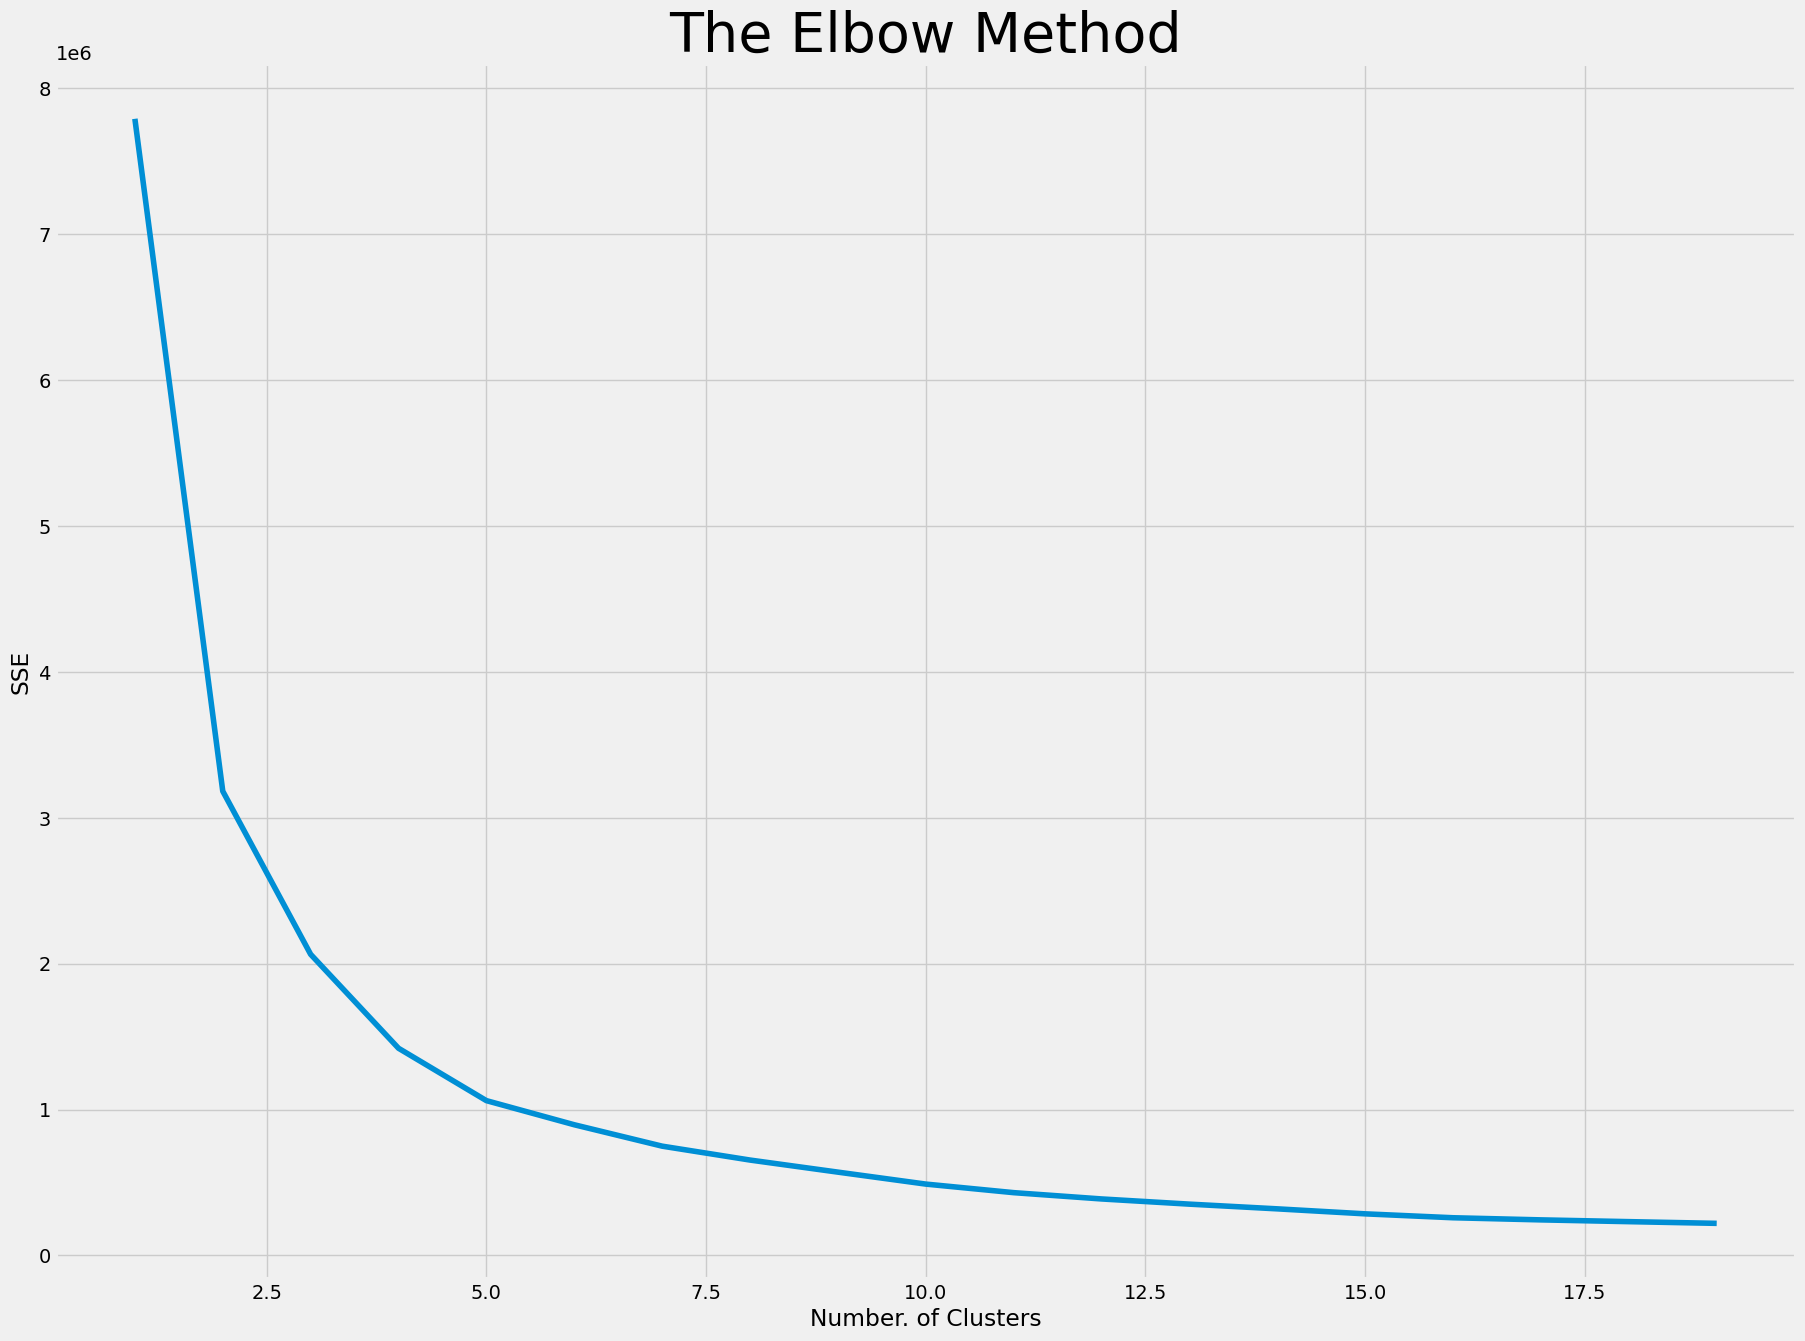

In [13]:
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (20,15)
sse = []
for i in range(1, 20):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 2201, n_init = 10, random_state = 0)
    km.fit(x)
    sse.append(km.inertia_)
plt.plot(range(1, 20), sse)
plt.title('The Elbow Method', fontsize = '40')
plt.xlabel('Number. of Clusters')
plt.ylabel('SSE')
plt.show()
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 2201, n_init = 20, random_state = 0)
y_means = km.fit_predict(x)
Weights= data['label']
y_means = pd.DataFrame(y_means)
Filter = pd.concat([y_means, Weights], axis = 1)
Filter = Filter.rename(columns = {0: 'cluster'})

In [14]:
print(" Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", Filter[Filter['cluster'] == 0]['label'].unique())
print("***************************************************************")
print("Crops in Second Cluster:", Filter[Filter['cluster'] == 1]['label'].unique())
print("***************************************************************")
print("Crops in Third Cluster:", Filter[Filter['cluster'] == 2]['label'].unique())
print("***************************************************************")
print("Crops in Fourth Cluster:", Filter[Filter['cluster'] == 3]['label'].unique())
print("***************************************************************")

 Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'pigeonpeas' 'pomegranate' 'banana' 'apple' 'orange' 'papaya'
 'coconut' 'cotton' 'coffee']
***************************************************************
Crops in Second Cluster: ['rice' 'papaya' 'coconut']
***************************************************************
Crops in Third Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mango'
 'coffee']
***************************************************************
Crops in Fourth Cluster: ['maize' 'mothbeans' 'mungbean' 'blackgram' 'lentil' 'grapes' 'watermelon'
 'muskmelon' 'papaya' 'cotton']
***************************************************************


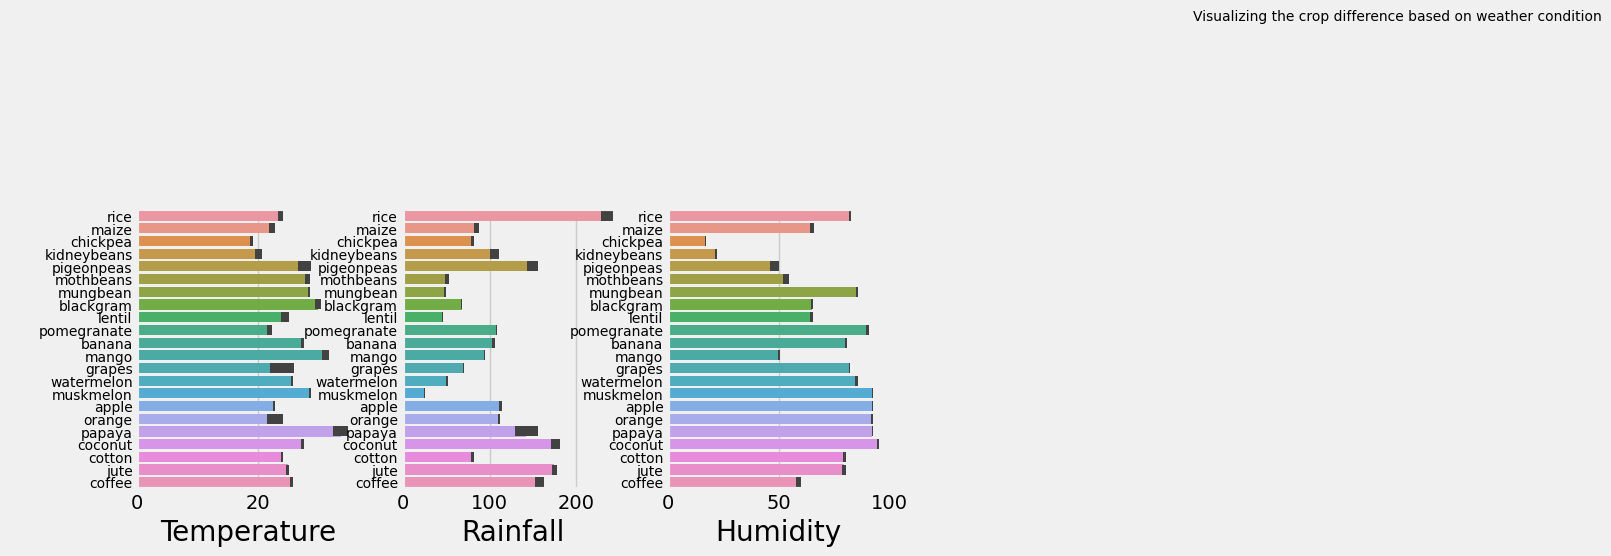

In [15]:
plt.rcParams['figure.figsize'] = (30,20)
plt.subplot(5,10, 1)
sns.barplot(data['temperature'], data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 20)
plt.yticks(fontsize = 10)
plt.subplot(5, 10, 2)
sns.barplot(data['rainfall'],data['label'] )
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 20)
plt.yticks(fontsize = 10)
plt.subplot(5, 10, 3)
sns.barplot(data['humidity'],data['label'] )
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 20)
plt.yticks(fontsize = 10)
plt.suptitle('Visualizing the crop difference based on weather condition', fontsize = 10)
plt.show()

In [16]:
y = data['label']
x = data.drop(['P','N','K','ph','label'], axis = 1)
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8 , random_state = 0)
print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

Shape of x: (2200, 3)
Shape of y: (2200,)
The Shape of x train: (1760, 3)
The Shape of x test: (440, 3)
The Shape of y train: (1760,)
The Shape of y test: (440,)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
    print('Accuracy : ', accuracy_score(y_test,y_pred))
    print('')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm,figsize=(100,80),show_normed=True)
    plt.title('Confusion Matrix for Logistic Regression', fontsize = 50)
    plt.show()

In [18]:
model_accuracy = pd.DataFrame(columns=['Model','Accuracy','Train_acc'])
model= {
          "KNN" : KNeighborsClassifier(),
          "DT" : DecisionTreeClassifier(),
          'RFC' : RandomForestClassifier(),
          'GBC' : GradientBoostingClassifier(),
          }

In [19]:
for test, clf in model.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    print("\n", test + ' scores')
    print(acc)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('*' * 50,"\n")
    model_accuracy = pd.DataFrame(columns=['Model','Accuracy','Train_acc'])
    model_accuracy= model_accuracy.append({'Model': y_test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index= True)


 KNN scores
0.8477272727272728
              precision    recall  f1-score   support

       apple       0.57      0.89      0.70        18
      banana       0.84      0.89      0.86        18
   blackgram       0.81      1.00      0.90        22
    chickpea       0.85      1.00      0.92        23
     coconut       0.70      0.93      0.80        15
      coffee       0.68      1.00      0.81        17
      cotton       0.70      0.88      0.78        16
      grapes       0.93      0.78      0.85        18
        jute       0.86      0.86      0.86        21
 kidneybeans       1.00      0.80      0.89        20
      lentil       0.89      1.00      0.94        17
       maize       0.94      0.89      0.91        18
       mango       0.91      1.00      0.95        21
   mothbeans       1.00      0.76      0.86        25
    mungbean       0.94      0.88      0.91        17
   muskmelon       1.00      1.00      1.00        23
      orange       0.78      0.61      0.68      

In [20]:
 model_accuracy.sort_values(ascending=False, by = 'Accuracy')

,Model,Accuracy,Train_acc
0,1320 watermelon 1367 watermelon 1291 ...,0.920455,1.0


Accuracy :  0.8477272727272728

Classification Report: 
               precision    recall  f1-score   support

       apple       0.57      0.89      0.70        18
      banana       0.84      0.89      0.86        18
   blackgram       0.81      1.00      0.90        22
    chickpea       0.85      1.00      0.92        23
     coconut       0.70      0.93      0.80        15
      coffee       0.68      1.00      0.81        17
      cotton       0.70      0.88      0.78        16
      grapes       0.93      0.78      0.85        18
        jute       0.86      0.86      0.86        21
 kidneybeans       1.00      0.80      0.89        20
      lentil       0.89      1.00      0.94        17
       maize       0.94      0.89      0.91        18
       mango       0.91      1.00      0.95        21
   mothbeans       1.00      0.76      0.86        25
    mungbean       0.94      0.88      0.91        17
   muskmelon       1.00      1.00      1.00        23
      orange       0.78 

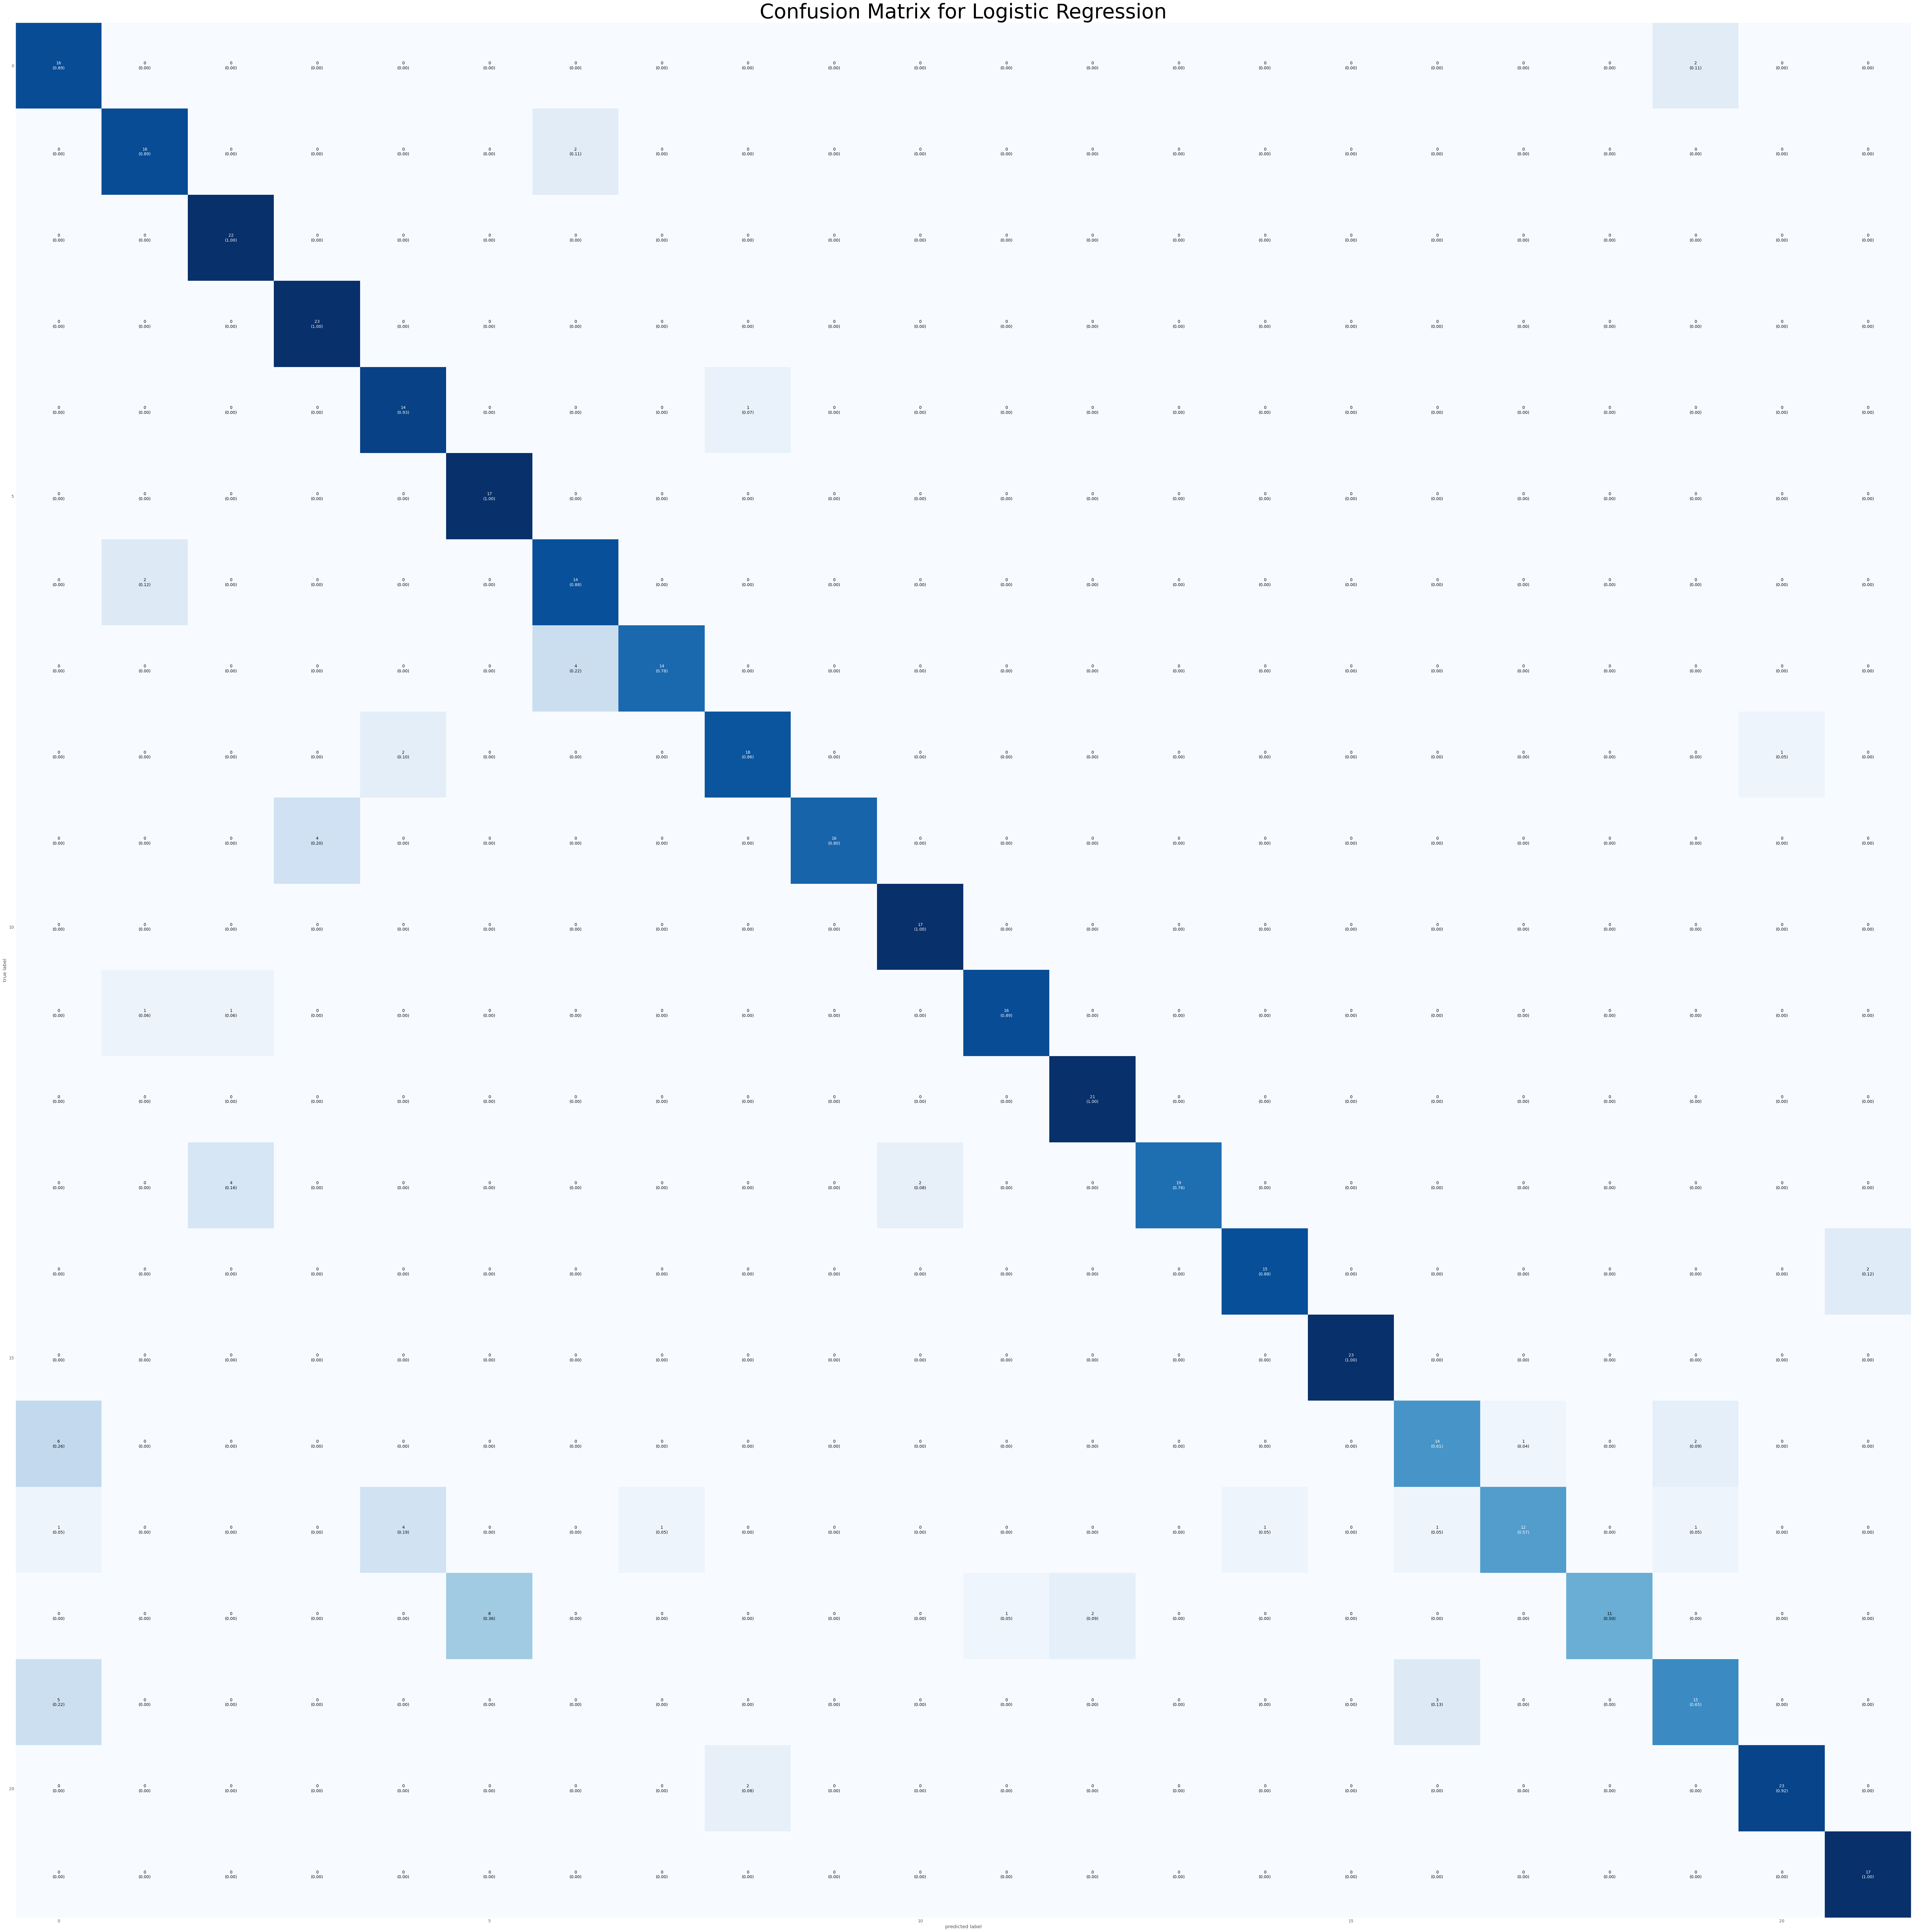

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [21]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(x_train,y_train)
pred_kn = kn_classifier.predict(x_test)
evaluator(y_test, pred_kn)
data.head()


In [23]:
prediction = kn_classifier.predict((np.array([[
                                       40,
                                       90,
                                       200]])))
print("The predicted Crop for Given Climatic Condition is :", prediction)

The predicted Crop for Given Climatic Condition is : ['papaya']


Accuracy :  0.8477272727272728

Classification Report: 
               precision    recall  f1-score   support

       apple       0.57      0.89      0.70        18
      banana       0.84      0.89      0.86        18
   blackgram       0.81      1.00      0.90        22
    chickpea       0.85      1.00      0.92        23
     coconut       0.70      0.93      0.80        15
      coffee       0.68      1.00      0.81        17
      cotton       0.70      0.88      0.78        16
      grapes       0.93      0.78      0.85        18
        jute       0.86      0.86      0.86        21
 kidneybeans       1.00      0.80      0.89        20
      lentil       0.89      1.00      0.94        17
       maize       0.94      0.89      0.91        18
       mango       0.91      1.00      0.95        21
   mothbeans       1.00      0.76      0.86        25
    mungbean       0.94      0.88      0.91        17
   muskmelon       1.00      1.00      1.00        23
      orange       0.78 

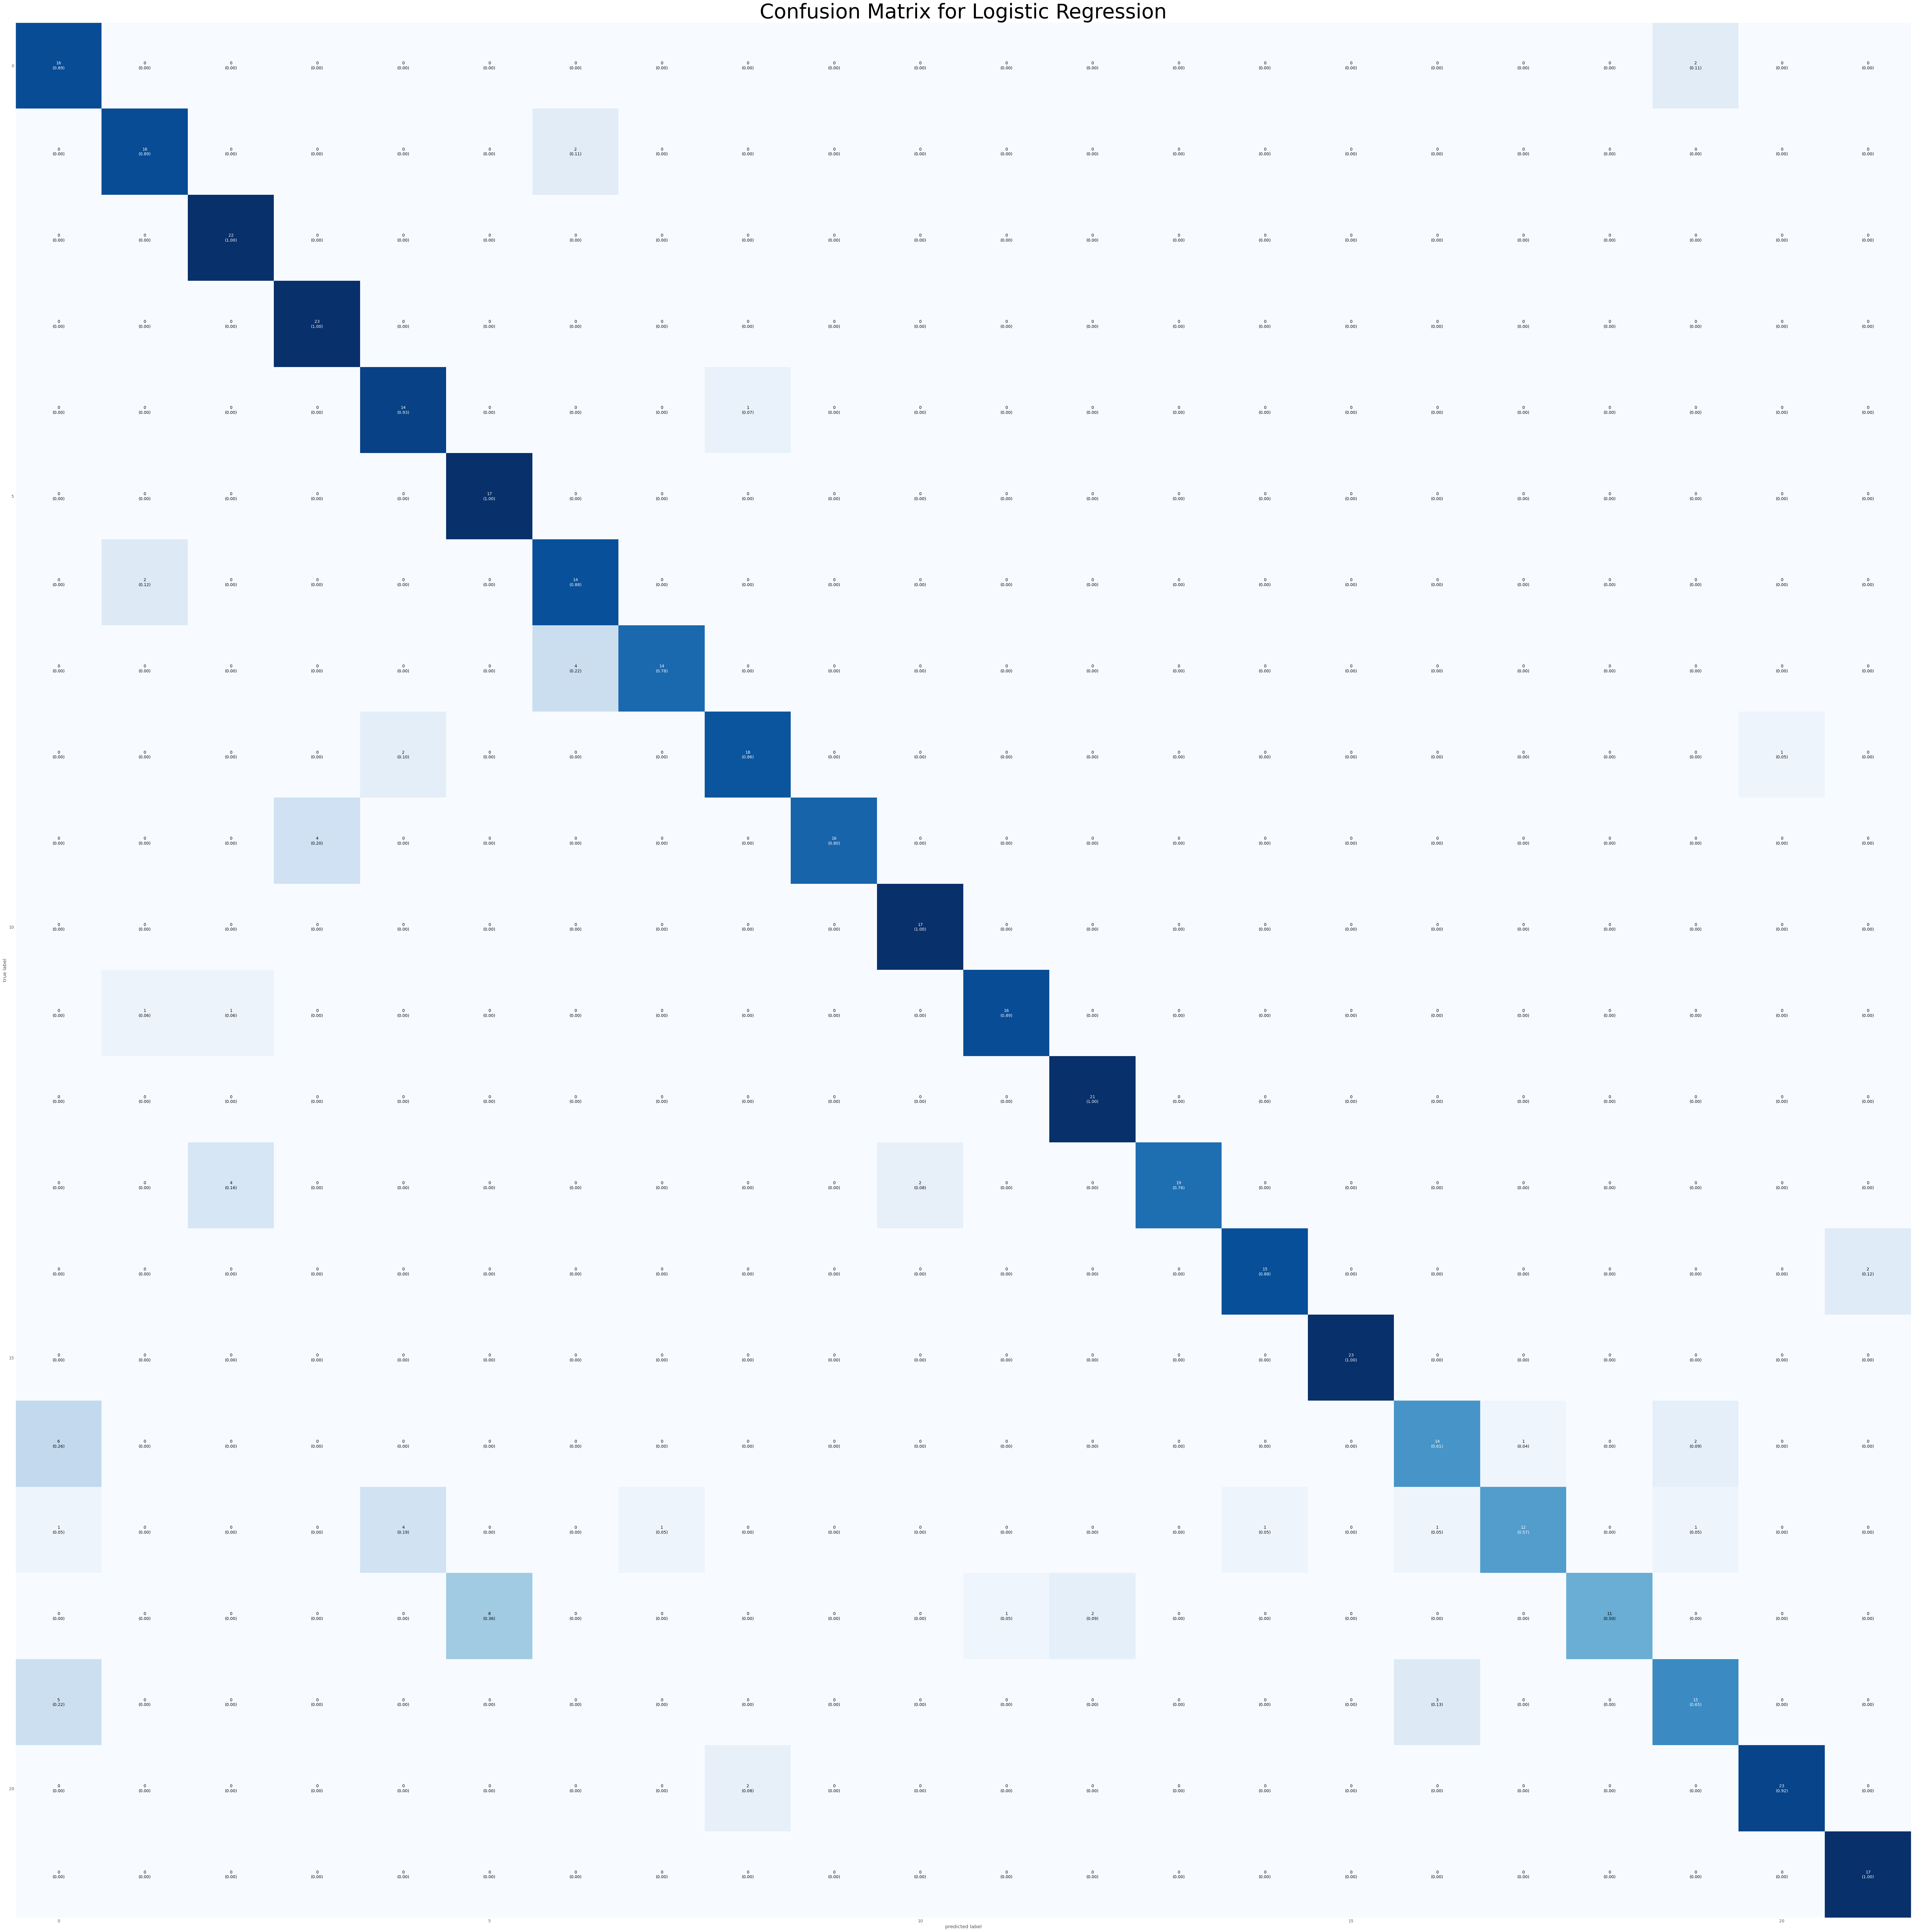

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(x_train,y_train)
pred_kn = kn_classifier.predict(x_test)
evaluator(y_test, pred_kn)

In [25]:
prediction = kn_classifier.predict((np.array([[
                                       15,
                                       90,
                                       100]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['orange']
